In [1]:
import sys
import cv2
import copy 
sys.path.insert(1, '../../src/')
import matplotlib.pyplot as plt
from models.vitpose.model import VITPoseModel
from utils.vision import DrawerPose
draw_skeleton = DrawerPose()

# Read image

(3024, 4032, 3)


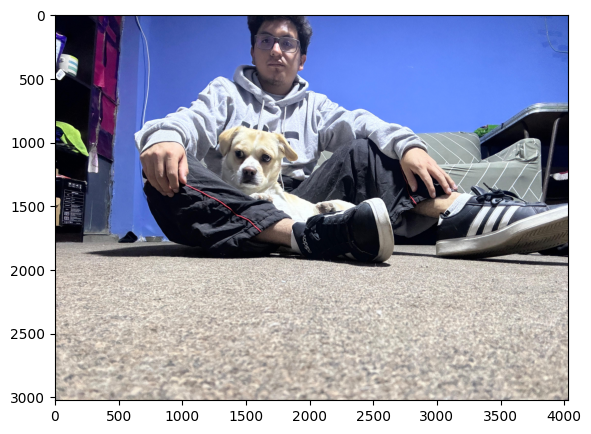

In [2]:
img     = cv2.imread("../../data/images/image_1.jpeg")
print(img.shape)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


fig=plt.figure(figsize=(10,5))
plt.imshow(img_rgb)
plt.show()

# Load model

In [3]:
model = VITPoseModel(device='cuda', model_name='ViTPose+_huge_coco_wholebody',
                 use_thresholding=False,kpt_thr=0.5)

/media/cristian/12FF1F6D0CD48422/Research/Gloss/Gloss/sign_env3.9/lib/python3.9/site-packages/onepose/models/weights/splitted_vitpose+_huge_coco_wholebody_half.pth is already downloaded.


In [4]:
keypoints, scores = model.predict(frame_rgb=img_rgb)

In [5]:
scores[0,:10]

array([0.9614063 , 0.96632975, 0.95525086, 0.9424044 , 0.9092628 ,
       0.9066362 , 0.9248358 , 0.92045665, 0.8278155 , 0.88438845],
      dtype=float32)

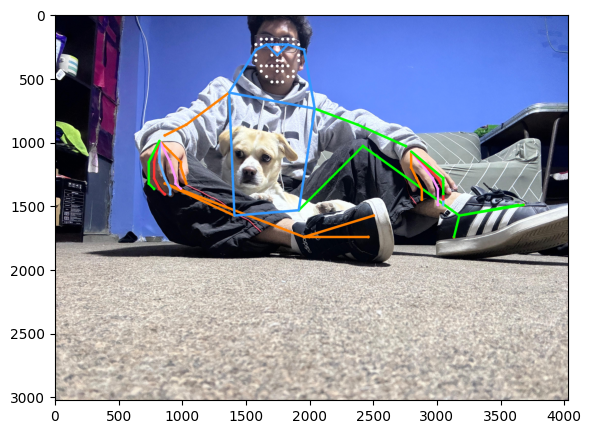

In [6]:
img_rgb_new2 = copy.deepcopy(img_rgb)
img_rgb_new2 = draw_skeleton(img_rgb_new2, keypoints, scores, kpt_thr=0.5,
                             line_width=18,radius=12)

fig=plt.figure(figsize=(10,5))
plt.imshow(img_rgb_new2)
plt.show()


In [7]:
keypoints.shape,scores.shape

((1, 133, 2), (1, 133))

In [8]:
type(keypoints),type(scores)

(numpy.ndarray, numpy.ndarray)

In [9]:
keypoints[0][:5],scores[0][:5]

(array([[1743.,  315.],
        [1827.,  231.],
        [1659.,  231.],
        [1953.,  273.],
        [1575.,  273.]], dtype=float32),
 array([0.9614063 , 0.96632975, 0.95525086, 0.9424044 , 0.9092628 ],
       dtype=float32))